# Analiza stanovanj
V projektni nalogi bom analizirala stanovanja, ki se oddajajo v Sloveniji. Zanimalo nas bo:
- kje so najdražja oz. najcenejša stanovanja
- kako stara so stanovanja in kdaj so bila adaptirana
- kje so najstarejša oz. najnovejša stanovanja
- kako se višina mesečne najemnine spreminja v odvisnosti od kraja, velikosti, starosti in tipa
- ali so stanovanja, ki jih oddajajo agencije dražja, katere so najdražje agencije

Podatki so bili zajeti s strani [nepremicnine.net](https://www.nepremicnine.net/).

## Predpriprava

In [2]:
# naložimo paket
import pandas as pd

# naložimo razpredelnico, s katero bomo delali
stanovanja1 = pd.read_csv('podatki/stanovanja.csv', index_col='id')

# namestimo, da izpiše do 20 vrstic
pd.options.display.max_rows = 20

# vključimo risanje grafov
%matplotlib inline
import matplotlib.pyplot as plt

Najprej si oglejmo, ali kakšno stanovanje cenovno zelo odstopa. 

In [3]:
stanovanja1['cena'].sort_values(ascending=False).round(2).head(5)

id
6302254    105000.0
6208667      3500.0
6296189      3500.0
6190450      3400.0
6145130      3300.0
Name: cena, dtype: float64

Vidimo, da eno stanovanje zelo odstopa, zato si oglejmo njegov opis, da ugotovimo ali je morda napisano, da se stanovanje prodaja ali pa ima zares tako visoko mesečno najemnino.

In [4]:
stanovanja1.loc[6302254]['opis']

'35 m2, 1,5-sobno, zgrajeno l. 1920, adaptirano l. 2016, 420 m2 zemljišča, P/2 nad., Prodamo stanovanje (v samostojni več...'

Glede na to, da se stanovanje prodaja, ga pri analizi ne bomo upoštevali.

In [5]:
stanovanja = stanovanja1.drop(6302254)

In [6]:
stanovanja

,regija,mesto,velikost,cena,tip,leto,adaptirano,nadstropje,agencija,opis,url
id,,,,,,,,,,,
6289943,LJ-mesto,Lj. Center,38.90,580.0,garsonjera,2005.0,NaN,NaN,"Stoja trade, d.o.o., Ljubljana","38,9 m2, garsonjera, zgrajena l. 2005, 3. nad....",https://www.nepremicnine.net/oglasi-oddaja/lj-...
6299148,LJ-mesto,Lj. Center,47.35,950.0,dvosobno,1961.0,2000.0,NaN,Garant - Gabrijela Smuk s.p.,"47,35 m2, 2-sobno, zgrajeno l. 1961, adaptiran...",https://www.nepremicnine.net/oglasi-oddaja/lj-...
6296970,LJ-mesto,Lj. Vič-Rudnik,105.00,1490.0,trisobno,2010.0,NaN,1,Zasebna ponudba,"105 m2, 3-sobno, zgrajeno l. 2010, 1/2 nad., 3...",https://www.nepremicnine.net/oglasi-oddaja/roz...
6225422,LJ-mesto,Lj. Šiška,60.00,1200.0,dvosobno,1935.0,2018.0,2,Akustika group d.o.o.,"60 m2, 2-sobno, zgrajeno l. 1935, adaptirano l...",https://www.nepremicnine.net/oglasi-oddaja/sp-...
6294509,J. Primorska,Koper,44.00,500.0,enosobno,1955.0,1997.0,P,"Focus nepremičnine, Eva Lukin s.p.","44 m2, 1-sobno, zgrajeno l. 1955, adaptirano l...",https://www.nepremicnine.net/oglasi-oddaja/ank...
...,...,...,...,...,...,...,...,...,...,...,...
6301360,LJ-mesto,Lj. Bežigrad,80.00,900.0,trisobno,1993.0,NaN,2,Zasebna ponudba,"80 m2, 3-sobno, zgrajeno l. 1993, 2/5 nad., od...",https://www.nepremicnine.net/oglasi-oddaja/zup...
6226907,LJ-mesto,Lj. Bežigrad,138.40,2000.0,NaN,1997.0,NaN,1,"Nepremičnine M8, Lea Kavalič s.p.","138,4 m2, 4-sobno, zgrajeno l. 1997, 1/5 nad.,...",https://www.nepremicnine.net/oglasi-oddaja/zup...
6282889,LJ-mesto,Lj. Bežigrad,130.00,1200.0,dvosobno,2019.0,NaN,6,Zasebna ponudba,"130 m2, 2-sobno, penthouse, zgrajeno l. 2019, ...",https://www.nepremicnine.net/oglasi-oddaja/zup...


## Razporejenost stanovanj

Lj. Center         192
Lj. Bežigrad        87
Lj. Vič-Rudnik      80
Lj. Šiška           72
Koper               52
Maribor             49
Piran               44
Lj. Moste-Polje     38
Novo mesto          20
Radovljica          19
Name: mesto, dtype: int64

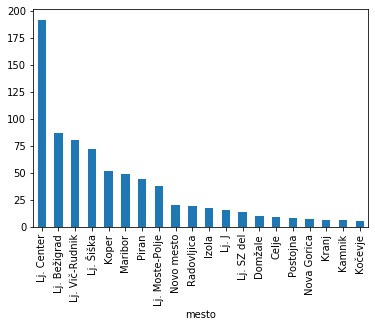

In [7]:
stanovanja.groupby('mesto').size().sort_values(ascending=False)[:20].plot.bar()
stanovanja['mesto'].value_counts()[:10]

Iz grafa je razvidno, da se največ stanovanj oddaja v Ljubljani, Kopru, Mariboru in Piranu.

## Starost stanovanj

Najprej preverimo, ali so vsi podatki ustrezni - ali je morda zapisano, da je bilo stanovanje adaptirano preden je bilo zgrajeno in ali je bilo kje stanovanje adaptirano istega leta kot je bilo zgrajeno. To so verjetno napačno vnešeni podatki. Stanovanja, ki so bila adaptirana preden so bila zgrajena bomo odstranili, pri stanovanjih, kjer je leto adaptacije in leto gradnje isto pa bomo odstranili leto izgradnje. Sklepali bomo, da za to stanovanje ni podatka o letu izgradnje.

In [8]:
adapt_preden_zgrajeni = stanovanja[stanovanja.adaptirano < stanovanja.leto]
print("Pri {} stanovanjih je zapisano, da je bilo stanovanje adaptirano, preden je bilo zgrajeno.".format(adapt_preden_zgrajeni.shape[0]))
for index, row in adapt_preden_zgrajeni.iterrows():
    stanovanja.drop(index)
adapt_istocasno_zgrajeno= stanovanja[stanovanja.adaptirano == stanovanja.leto]
print("Pri {} stanovanjih je zapisano, da je bilo stanovanje adaptirano istega leta kot je bilo zgrajeno.".format(adapt_istocasno_zgrajeno.shape[0]))
for index, row in adapt_istocasno_zgrajeno.iterrows():
    stanovanja.at[index, 'leto'] = None

Pri 2 stanovanjih je zapisano, da je bilo stanovanje adaptirano, preden je bilo zgrajeno.
Pri 123 stanovanjih je zapisano, da je bilo stanovanje adaptirano istega leta kot je bilo zgrajeno.


Poglejmo koliko stanovanj je bilo zgrajeno v posameznem letu.

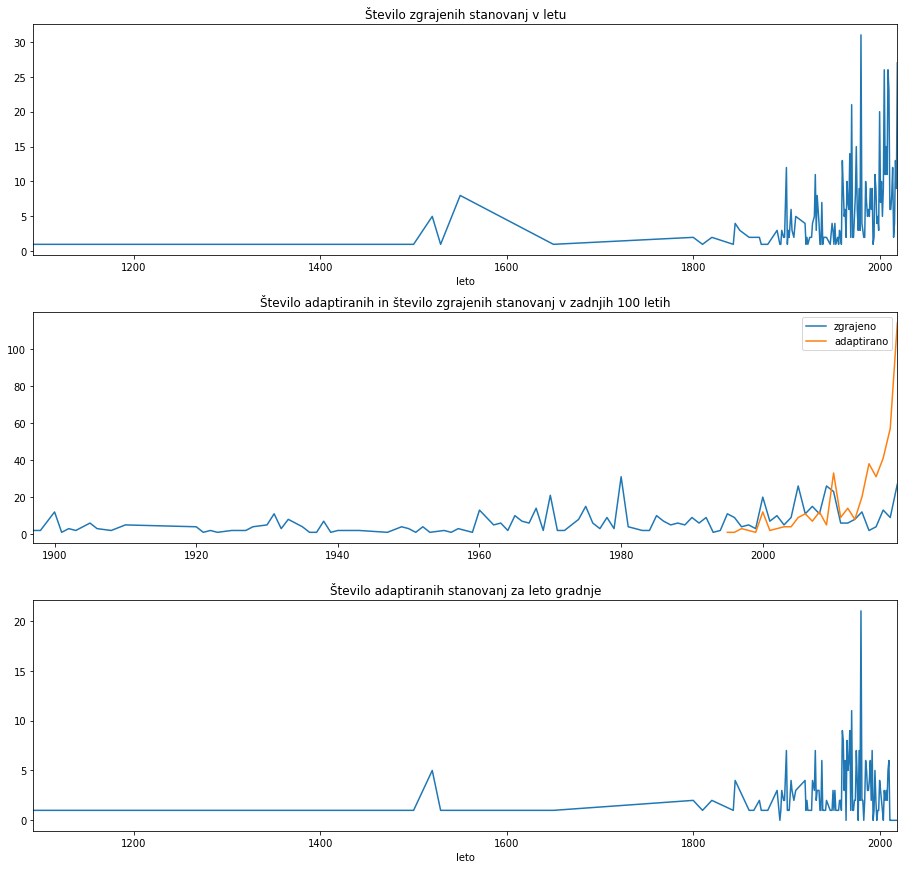

In [9]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[2, 2, 2, 0.8])
ax2 = fig.add_subplot(121, position=[2, 1, 2, 0.8])
ax3 = fig.add_subplot(211, position=[2, 0, 2, 0.8])

stanovanja.groupby('leto').size().plot(title= "Število zgrajenih stanovanj v letu", ax = ax1)

leta = stanovanja.groupby('leto').size().to_frame(name = 'zgrajeno')
adaptacije = stanovanja.groupby('adaptirano').size().to_frame(name = 'adaptirano')
po_letih = pd.concat([leta, adaptacije], axis = 1)

po_letih.tail(100).plot(title = "Število adaptiranih in število zgrajenih stanovanj v zadnjih 100 letih", ax = ax2)

stanovanja.groupby('leto')['adaptirano'].count().plot(title = "Število adaptiranih stanovanj za leto gradnje", ax = ax3)

Iz prvega grafa je razvidno, da je bilo že kar nekaj stanovanj zgrajenih že v 16. stoletju, večina stanovanj pa med leti 1900 in 2000. Največ stanovanj je bilo adaptiranih po letu 2000. V zadnjih letih je bilo veliko več stanovanj adaptiranih kot zgrajenih. Kar nekaj ne zelo starih stanovanj, zgrajenih v zadnjih nekaj letih, je bilo tudi adaptiranih.
Poglejmo si nekaj najstarejših stanovanj:

In [10]:
stanovanja[stanovanja.leto < 1600].sort_values(by = 'leto').head(10)

,regija,mesto,velikost,cena,tip,leto,adaptirano,nadstropje,agencija,opis,url
id,,,,,,,,,,,
6298810,LJ-mesto,Lj. Center,110.76,1500.0,trisobno,1092.0,2009.0,NaN,"Stoja trade, d.o.o., Ljubljana","110,76 m2, 3-sobno, zgrajeno l. 1092, adaptira...",https://www.nepremicnine.net/oglasi-oddaja/lj-...
6097269,LJ-mesto,Lj. Center,96.76,2100.0,dvosobno,1456.0,2017.0,NaN,LJUBLJANA NEPREMIČNINE d.o.o.,"96,76 m2, 2-sobno, zgrajeno l. 1456, adaptiran...",https://www.nepremicnine.net/oglasi-oddaja/sta...
6288569,LJ-mesto,Lj. Center,120.00,1300.0,trisobno,1500.0,2015.0,3,Rocco nepremičnine d.o.o.,"120 m2, 3-sobno, zgrajeno l. 1500, adaptirano ...",https://www.nepremicnine.net/oglasi-oddaja/lj-...
6300042,LJ-mesto,Lj. Center,80.90,1550.0,trisobno,1520.0,2011.0,NaN,LJUBLJANA NEPREMIČNINE d.o.o.,"80,9 m2, 3-sobno, zgrajeno l. 1520, adaptirano...",https://www.nepremicnine.net/oglasi-oddaja/lj-...
6298030,LJ-mesto,Lj. Center,85.00,1600.0,dvosobno,1520.0,2011.0,NaN,LJUBLJANA NEPREMIČNINE d.o.o.,"85 m2, 2-sobno, zgrajeno l. 1520, adaptirano l...",https://www.nepremicnine.net/oglasi-oddaja/lj-...
6145130,LJ-mesto,Lj. Center,204.70,3300.0,NaN,1520.0,2010.0,NaN,Nepremičnine Plus d.o.o.,"204,7 m2, 4-sobno, zgrajeno l. 1520, adaptiran...",https://www.nepremicnine.net/oglasi-oddaja/lj-...
6287359,LJ-mesto,Lj. Center,176.90,3000.0,NaN,1520.0,2010.0,NaN,"Stoja trade, d.o.o., Ljubljana","176,9 m2, 4-sobno, zgrajeno l. 1520, adaptiran...",https://www.nepremicnine.net/oglasi-oddaja/lj-...
6289877,LJ-mesto,Lj. Center,85.00,1647.0,dvosobno,1520.0,2011.0,NaN,"Stoja trade, d.o.o., Ljubljana","85 m2, 2-sobno, zgrajeno l. 1520, adaptirano l...",https://www.nepremicnine.net/oglasi-oddaja/sta...
6209977,LJ-mesto,Lj. Center,52.50,1100.0,dvosobno,1529.0,2000.0,NaN,"Nepremičninska družba d.o.o., PE RE/MAX Vogal","52,5 m2, 2-sobno, zgrajeno l. 1529, adaptirano...",https://www.nepremicnine.net/oglasi-oddaja/lj-...


Opazimo, da je eno stanovanje iz leta 1092. To je bila najverjetneje napaka pri vnosu podatkov, morda je bilo zgrajeno 1902. Je pa kar nekaj stanovanj zelo starih stanovanj, zgrajenih še pred letom 1600. Vsa se nahajajo v centru Ljubljane in vsa so bila adaptirana.

### Najnovejša in najstarejša stanovanja

Zanima nas, kje se nahaja največ stanovanj zgrajenih v zadnjih petih letih in kje je največ stanovanj, zgrajenih pred 1850.

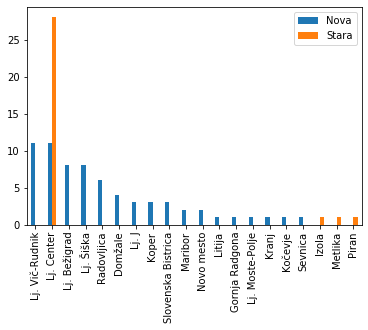

In [11]:
nova = stanovanja[stanovanja.leto >= 2014]
nova_po_mestu = nova.groupby('mesto').size().to_frame(name = "Nova")
stara = stanovanja[stanovanja.leto <= 1850]
stara_po_mestu = stara.groupby('mesto').size().to_frame(name = "Stara")
nova_stara = pd.concat([nova_po_mestu, stara_po_mestu], sort =False, axis = 1)
nova_stara.sort_values(by = "Nova", ascending = False).plot.bar()

Največ novih stanovanj je na Viču, v centru Ljubljane in na Bežigradu. Daleč največ najstarejših je v centru Ljubljane, nekaj pa jih je tudi v Piranu, Izoli in Metliki. Iz radovednosti si oglejmo povprečno leto gradnje:

In [12]:
stanovanja['leto'].mean().round(0)

1963.0

Ali je bila večina starejših stanovanj adaptirana? 

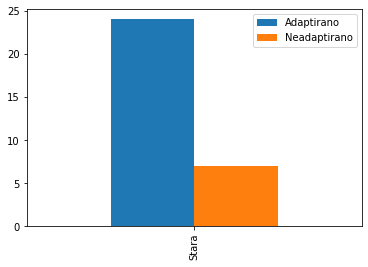

In [13]:
vrednosti = [[stara.adaptirano.count(), stara.shape[0] - stara.adaptirano.count()]]
adaptacija_starih_in_novih = pd.DataFrame(vrednosti, columns = ["Adaptirano", "Neadaptirano"], index = ["Stara"])
adaptacija_starih_in_novih.plot.bar()

## Tipi stanovanj

[Text(0, 0.5, '')]

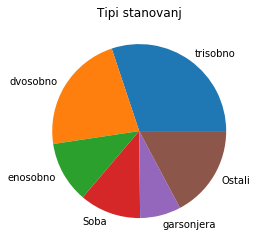

In [14]:
tipi = stanovanja.groupby('tip').size().sort_values(ascending=False)
glavni_tipi = tipi.head(5)
glavni_tipi.loc['Ostali']= sum(tipi[-6:])
glavni_tipi.plot.pie(title = 'Tipi stanovanj').set(ylabel = '')

Največ je trisobnih in dvosobnih stanovanj.

## Cena

### Povprečna mesečna najemnina

Oglejmo si povprečne mesečne najemnine:

In [15]:
povprecje = stanovanja['cena'].mean()
mediana = stanovanja['cena'].median()
print('Povprečje: {} €, Mediana: {} €'.format(povprecje.round(2), mediana.round(2)))

Povprečje: 867.23 €, Mediana: 700.0 €


In [16]:
stanovanja['cena/m^2'] = (stanovanja['cena']/stanovanja['velikost']).round(2)
povprecni_m = stanovanja['cena/m^2'].mean()
print('Povprečna cena na kvadratni meter: {} €/m^2'.format(povprecni_m.round(2)))

Povprečna cena na kvadratni meter: 12.33 €/m^2


### Cena v odvisnosti od kraja in regije

mesto
Lj. Center         1367.30
Lj. Vič-Rudnik     1056.59
Lj. Bežigrad       1038.13
Lj. Šiška           925.01
Lj. Moste-Polje     852.11
Name: cena, dtype: float64

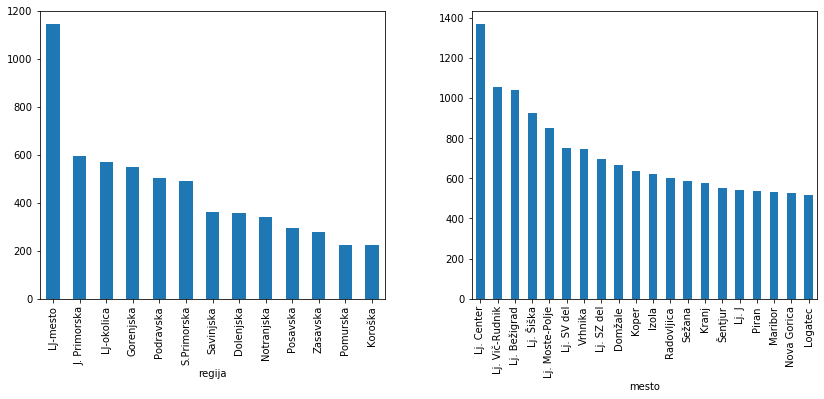

In [17]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.8, 1])
ax2 = fig.add_subplot(121, position=[1, 0, 0.8, 1])

cena_regija = stanovanja.groupby('regija').mean()['cena'].sort_values(ascending=False).round(2)
cena_regija.plot.bar(ax = ax1)

cena_mesto = stanovanja.groupby('mesto').mean()['cena'].sort_values(ascending=False).round(2)
cena_mesto[:20].plot.bar(ax = ax2)
cena_mesto[:5]

Razvidno je, da so stanovanja v Ljubljani veliko dražja kot drugje. Najdražja so v centru, nadpovprečne najemnine so pa tudi v Viču, na Bežigradu in v Šiški. Oglejmo si še kraje z najnižjimi najemninami:

In [18]:
cena_mesto.tail(5)

mesto
Radlje ob Dravi      200.00
Hrastnik             150.00
Tržič                150.00
Šmarje pri Jelšah    135.00
Žalec                133.75
Name: cena, dtype: float64

### Cena stanovanja v odvisnosti od velikosti

Poglejmo si, kako se mesečna najemnina in cena kvadratnega metra spreminja v odvisnosti od velikosti stanovanja.

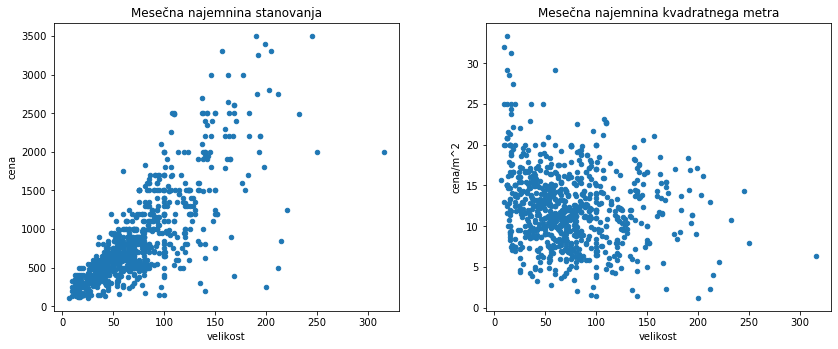

In [19]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.8, 1])
ax2 = fig.add_subplot(121, position=[1, 0, 0.8, 1])
stanovanja.plot(title = "Mesečna najemnina stanovanja", x='velikost', y='cena', kind='scatter', ax= ax1)
stanovanja.plot(title = "Mesečna najemnina kvadratnega metra", x='velikost', y='cena/m^2', kind='scatter', ax= ax2)

Razvidno je, da mesečna najemnina z velikostjo narašča, površno pa lahko rečemo, da cena kvadratnega metra z velikostjo pada. Opazimo tudi, da je največ stanovanj manjših kot 100 m^2, zanimivo pa je da je tudi stanovanje, večje kot 300 m^2.

In [20]:
stanovanja[stanovanja.velikost >=300]

,regija,mesto,velikost,cena,tip,leto,adaptirano,nadstropje,agencija,opis,url,cena/m^2
id,,,,,,,,,,,,
6236997,J. Primorska,Piran,315.0,2000.0,petsobno,1970.0,1998.0,NaN,Samrok nepremičnine d.o.o.,"315 m2, 5 in večsobno, zgrajeno l. 1970, adapt...",https://www.nepremicnine.net/oglasi-oddaja/por...,6.35


### Cena v odvisnosti od tipa

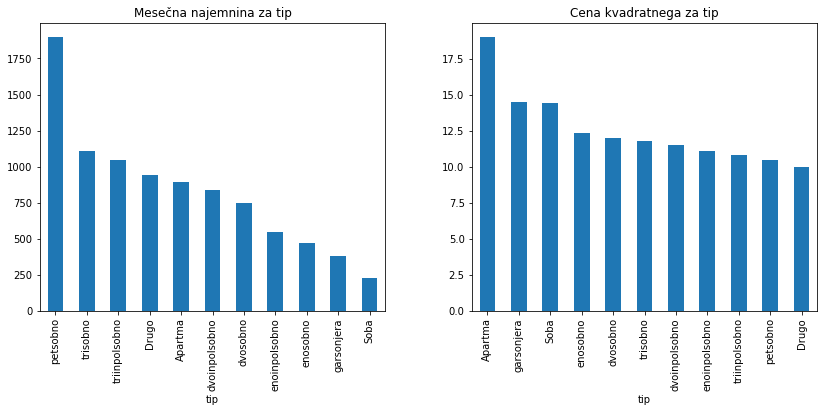

In [21]:
cena_tip = stanovanja.groupby('tip')
cena_tip_m2 = stanovanja.groupby('tip')
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.8, 1])
ax2 = fig.add_subplot(121, position=[1, 0, 0.8, 1])
cena_tip['cena'].mean().sort_values(ascending=False).plot.bar(title= "Mesečna najemnina za tip", ax = ax1)
cena_tip_m2['cena/m^2'].mean().sort_values(ascending=False).plot.bar(title = "Cena kvadratnega za tip", ax= ax2)

Opazimo, da imajo večsobna stanovanja višjo mesečno najemnino, imajo pa cenejši kvadratni meter. Najdražji kvadratni meter majo apartmaji, garsonjere in posamične sobe.

### Cena v odvisnoti od starosti

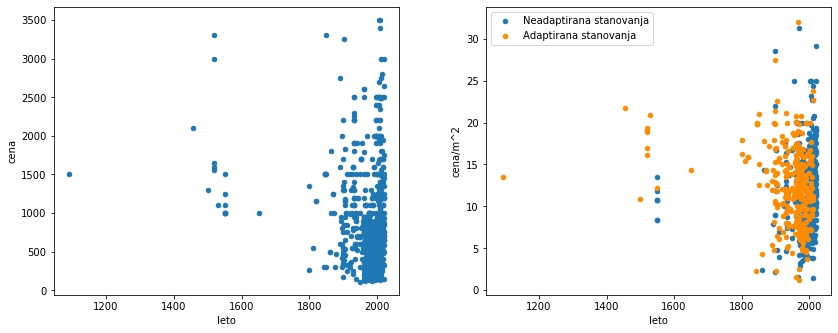

In [22]:
fig = plt.figure(1)
ax1 = fig.add_subplot(111, position=[0, 0, 0.8, 1])
ax2 = fig.add_subplot(121, position=[1, 0, 0.8, 1])
stanovanja.plot(x='leto', y='cena', kind='scatter', ax= ax1)

adaptirana_stanovanja = stanovanja[stanovanja.adaptirano.notnull()]
neadaptirana_stanovanja = stanovanja[stanovanja.adaptirano.isnull()]

neadaptirana = neadaptirana_stanovanja.plot.scatter(x='leto', y='cena/m^2', label='Neadaptirana stanovanja', ax=ax2);
adaptirana_stanovanja.plot.scatter(x='leto', y='cena/m^2', color='darkorange', label='Adaptirana stanovanja', ax=neadaptirana);

Kot smo že ugotovili, je opazno, da je bilo največ stanovanj zgrajenih konec 20. stoletja. Ni pa neke očitne povezave med starostjo stanovanja in ceno mesečne najemnine. Ni niti neke opazne razlike med ceno adaptiranih in neadaptiranih stanovanj.

## Agencije

In [23]:
agencije = stanovanja.groupby('agencija').size().sort_values(ascending=False)

[Text(0, 0.5, '')]

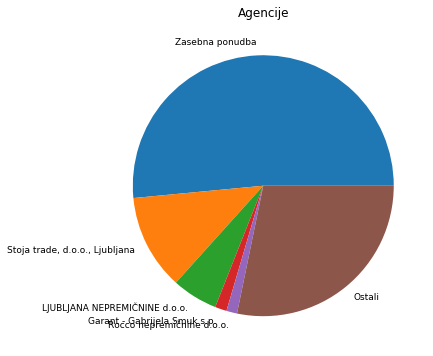

In [24]:
glavne_agencije = agencije.head(5)
glavne_agencije.loc['Ostali']= sum(agencije[-119:])
glavne_agencije.plot.pie(figsize=(10, 6), fontsize=9, title = 'Agencije').set(ylabel = '')

Vidimo, da je večina stanovanj v zasebni ponudbi.

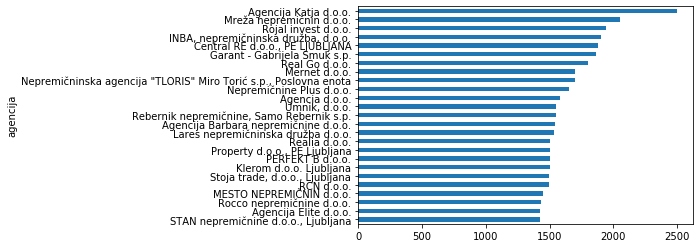

In [25]:
cena_agencija = stanovanja.groupby('agencija').mean().round(2)['cena']
cena_agencija.sort_values()[-25:].plot.barh()

Najdražja stanovanja ima Agencija Katja d. o. o., Mreža nepremičnin d. o. o in Rojal investment d. o. o.. Zanima nas še, ali so stanovanja v zasebnih ponudbah res cenejša od stanovanj, ki jih oddajajo agencije in ali vpliva morda še kaj drugega na ceno teh stanovanj.

In [26]:
zasebna_stanovanja = stanovanja[stanovanja.agencija == "Zasebna ponudba" ]
agencijska_stanovanja = stanovanja[stanovanja.agencija !="Zasebna ponudba"]

In [27]:
vrednosti = [[x['cena'].mean().round(2), 
              x.shape[0],
              x['leto'].mean().round(0),
              x['velikost'].mean().round(2),
              x['tip'].value_counts().idxmax(),
              x['mesto'].value_counts().idxmax()]
             for x in [agencijska_stanovanja, zasebna_stanovanja]]
agencijska_in_zasebna_stanovanja = pd.DataFrame(vrednosti, 
                                                columns = ['Povprečna cena', 'Število ponudb', 'Starost', 'Velikost', 'Tip', 'Mesto'],
                                                index = ["Stanovanja iz agencij", "Zasebna stanovanja"])
agencijska_in_zasebna_stanovanja

,Povprečna cena,Število ponudb,Starost,Velikost,Tip,Mesto
Stanovanja iz agencij,1196.08,402,1949.0,94.88,trisobno,Lj. Center
Zasebna stanovanja,557.64,427,1980.0,53.23,trisobno,Lj. Bežigrad


Vidimo, da so stanovanja iz agencij veliko dražja, so pa v povprečju tudi večja in največ jih je v centru Ljubljane, kar smo pa že prej ugotovili, da vpliva na ceno.

## Zaključek

V projektni nalogi smo ugotovili, da je največ stanovanj v Ljubljani in okolici Ljubljane. Večina stanovanj je bila zgrajenih v 2. polovici 20. stoletja, je pa kar nekaj stanovanj že iz 16. stoletja. Ta se nahajajo v centru Ljubljane in so v večini bila adaptirana. Povprečna mesečna najemnina je 867€. Najdražja stanovanja so v Ljubljani, najcenejša pa v Žalcu. Ugotovili smo da mesečna najemnina z velikostjo stanovanja narašča, vendar pa imajo manjša stanovanja  (apartmaji, garsonjere, sobe) dražji kvadratni meter. Starost stanovanj ne vpliva na višino mesečne najemnine in prav tako ni neke opazne razlike med adaptiranimi in neadaptiranimi stanovanji. Stanovanja, ki jih oddajajo agencije so kar 2x dražja od stanovanj, ki jih oddajajo zasebniki, so pa ta večinoma tudi na boljši lokaciji, in večja, kar verjetno tudi vpliva na višino najemnine. 